<a href="https://colab.research.google.com/github/sukhmancs/my_projects/blob/main/google_colab/math_question_solver_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The default values are: [33.0, 42.0, 49.0, 49.0, 53.0, 55.0, 55.0, 61.0, 63.0, 67.0, 68.0, 68.0, 69.0, 69.0, 72.0, 73.0, 74.0, 78.0, 80.0, 83.0, 88.0, 88.0, 88.0, 90.0, 92.0, 94.0, 94.0, 94.0, 94.0, 96.0, 100.0]

Enter data values (separated with spaces or hit enter to keep default values): 

What type of figure would you like to draw? 
(1=histogram, 2=pie chart, 3=bar chart, 4=frequency table, 5=stem and leaf plot)

3




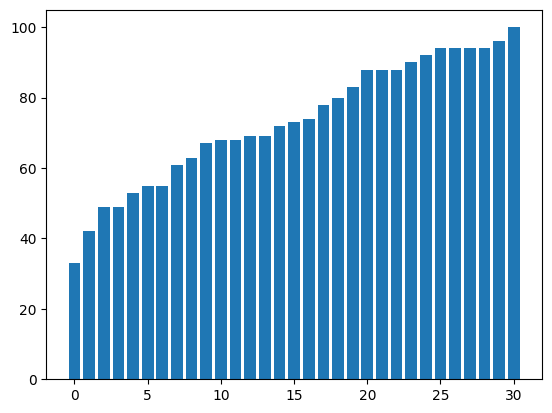

In [ ]:
#@title Data Visualization
import matplotlib.pyplot as plt
import pandas as pd

def visualize_data():

  data_values = []
  data = "33; 42; 49; 49; 53; 55; 55; 61; 63; 67; 68; 68; 69; 69; 72; 73; 74; 78; 80; 83; 88; 88; 88; 90; 92; 94; 94; 94; 94; 96; 100"
  data = data.replace("; ", " ")
  data_value = data.split()
  data_values = [float(value) for value in data_value]
  print("The default values are: {}\n".format(data_values))

  # Ask user for data values
  value = input("Enter data values (separated with spaces or hit enter to keep default values): ").split()

  if (len(value) != 0):
    try:
        data_values = [float(v) for v in value]
    except ValueError:
        print("Invalid input, please enter a number.")

  # Ask user for type of figure to draw
  figure_type = input("\nWhat type of figure would you like to draw? \n(1=histogram, 2=pie chart, 3=bar chart, 4=frequency table, 5=stem and leaf plot)\n\n")
  print("\n")
  # Draw figure based on user input
  if figure_type == "1":
      plt.hist(data_values)
      plt.show()
  elif figure_type == "2":
      plt.pie(data_values)
      plt.show()
  elif figure_type == "3":
      plt.bar(range(len(data_values)), data_values)
      plt.show()
  elif figure_type == "4":
      freq_table = pd.Series(data_values).value_counts().sort_index()
      print(freq_table)
  elif figure_type == "5":
      stem_values, leaf_values = [], []
      for value in data_values:
          stem = int(value // 10)
          leaf = int(value % 10)
          stem_values.append(stem)
          leaf_values.append(leaf)
      df = pd.DataFrame({'Stem': stem_values, 'Leaf': leaf_values})
      df = df.groupby('Stem').apply(lambda x: pd.Series(x['Leaf'].tolist())).unstack()
      print(df.to_string(index=False, header=False))
  else:
      print("Invalid input, please enter a valid figure type.")

# Call the method
visualize_data()

In [ ]:
#@title Calculate probabilities

import math
from scipy.stats import norm

def calculate_probability():
  
  # Ask for values or just keep the default values
  mean = input("Enter your mean (default to 90): ")
  mean = float(mean) if mean else 90

  std_dev = input("Enter your std_dev (default to 15): ")
  std_dev = float(std_dev) if std_dev else 15

  n = input("Enter your n (default to 25): ")
  n = float(n) if n else 25

  # Ask for the user for values
  values = input("Enter the values between you want to calculate the probabilities (seperated with spaces): ").split()  
  values = [float(v) for v in values] if values else [85, 92] # ternary operator for default values

  std_error = std_dev / math.sqrt(n) # Standard Error
  zscore_1 = (values[0] - mean) / std_error # z_scores
  zscore_2 = (values[1] - mean) / std_error

  prob = round((abs(norm.cdf(zscore_1) - norm.cdf(zscore_2))) * 100) # Probability rounded to nearest percent
  print(prob, "%")

calculate_probability() # Finally call the method

Enter your mean (default to 90): 
Enter your std_dev (default to 15): 
Enter your n (default to 25): 
Enter the values between you want to calculate the probabilities (seperated with spaces): 
70 %


In [ ]:
#@title Calculate Confidence Interval

import math
from scipy import stats

def calc_confidence_internal():
  
  # Ask the user for values
  sample_mean = input("Enter sample mean (default 36): ")
  n = input("Enter n (default 100): ")
  sample_std_dev = input("Enter sample standard deviation (default 6): ")
  confidence_level_80 = input("Enter confidence level (default 80): ")
  confidence_level_95 = input("Enter confidence level (default 95): ")

  # Default values if nothing selected
  sample_mean = float(sample_mean) if sample_mean else 36
  n = float(n) if n else 100
  sample_std_dev = float(sample_std_dev) if sample_std_dev else 6
  confidence_level_80 = float(confidence_level_80) if confidence_level_80 else 0.80
  confidence_level_95 = float(confidence_level_95) if confidence_level_95 else 0.95

  # Calculate the standard error
  std_error = sample_std_dev / math.sqrt(n)

  # Calculate the z-scores for the confidence levels
  z_80 = abs(stats.norm.ppf((1 - confidence_level_80) / 2))
  z_95 = abs(stats.norm.ppf((1 - confidence_level_95) / 2))

  # Calculate the margin of error for the confidence intervals
  margin_error_80 = z_80 * std_error
  margin_error_95 = z_95 * std_error

  # Calculate the confidence intervals
  conf_interval_80 = (sample_mean - margin_error_80, sample_mean + margin_error_80)
  conf_interval_95 = (sample_mean - margin_error_95, sample_mean + margin_error_95)

  # Print the results
  print("{:.0f}% confidence interval: ({:.2f}, {:.2f})".format(confidence_level_80 * 100, conf_interval_80[0], conf_interval_80[1]))
  print("{:.0f}% confidence interval: ({:.2f}, {:.2f})".format(confidence_level_95 * 100, conf_interval_95[0], conf_interval_95[1]))

calc_confidence_internal()

Enter sample mean (default 36): 
Enter n (default 100): 
Enter sample standard deviation (default 6): 
Enter confidence level (default 80): 
Enter confidence level (default 95): 
80% confidence interval: (35.23, 36.77)
95% confidence interval: (34.82, 37.18)
